# 07. 딥러닝 추천 시스템

<br>

## 07.01. MF를 신경망으로 변환
- MF는 신경망 모형으로 구현 가능
    
    **은닉층이 없는 신경망의 경우, 기본적인 MF알고리즘과 같은 모형**

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fo5UYF%2FbtrrqZ8T8dB%2Fw785IZAwdsKDFXi0iQ06Xk%2Fimg.png'>


<br>

#### One-hot Representation

- **$M$명의 사용자와 $N$개의 아이템이 있을 때, 사용자의 입력은 $M$(사용자의 수) $\times$ $M$ (feature 수)가 되며,**

  **각 사용자에 대한 입력은 해당 사용자에 대한 원소만 1이고 나머지는 0**

  - 아이템의 입력도 $N \times N$ 차원의 입력


- One-hot Representation이 $M \times M$  또는 $N \times N$으로 행과 열이 같은 차원을 가지는 이유 :

  **사용자의 경우 One-hot Representation의 목적은 각 사용자를 구분하는 것**

  $→$ **feature를 일종의 가변수처럼 사용하여, 사용자 1명당 하나의 feature만 1의 값을 가지고, 반대로 한 feature는 한 사용자에 대해서만 1의 값을 가짐**

  $→$ **따라서, 행과 열의 차원이 같게 되고, 대각선 원소만 1이고 나머지는 0인 행렬이 생성**

<br>

#### Embedding Layer
- MF에서 잠재요인$K$에 해당하는 부분
- 즉, 사용자에 대해서 $K$개, 아이템에 대해서 또 다른 $K$개의 노드를 가지는 Layer
- **각 노드는 하나의 잠재요인을 의미하며, User Input의 모든 feature에서 사용자 Embedding Layer의 모든 노드는 연결되어 있음**

  $\rightarrow$ **한 사용자당 $k$개의 연결이 존재**

- **아이템도 동일하게 $N\times K$개의 화살표가 아이템 쪽의 Embedding Layer로 연결되어 있으며,**

  **동일하게 한 아이템당 $K$개의 연결이 생성**

- **입력층에서 Embedding Layer의 각 요소로 가는 이 연결이 MF에서 $P$와 $Q$행렬의 각 원소를 의미**

  **MF에서 $P$행렬은 $M \times K$의 원소 수를 가지고, $Q$행렬은 $N\times K$의 원소 수를 가짐**

  **입력이 원-핫 인코딩이기 때문에, 사용자 한명에 대해서 각각 $K$개씩의 연결이 활성화**

  - **위의 그림에서 User 2는 (두 번째 행) 두 번째 열만 1이고 나머지는 0**

  $→$ **Embedding Layer로 가는 User 2의 연결 중에서, 두 번째 열에 연결된 $K$개만 활성화 되고, 나머지는 모두 0 $→$ 이 $K$개의 연결이 MF에서는 $P$행렬에서 2번 째 열 ($p_2$)에 있는 $K$개의 요소에 대응**


- **$n-1$번째 아이템의 경우, 입력층에서 $n-1$번째 열의 값만 1을 가짐**

  $→$ **$n-1$번째 열에 연결된 $K$개만 활성화 됨**

<br>

#### Element-wise Product Layer
- Embedding Layer의 두 요소(사용자, 아이템)의 내적 연산을 위한 층
  
  $→$ **MF에서의 $P\times Q^T$ 연산에 해당**

- **사용자와 아이템은 한 번에 하나씩만 활성화되기에, 내적 연산을 한 결과는 해당 사용자의 해당 아이템에 대한 $P \times Q^T$행렬의 원소가 됨**

  $|rightarrow$ **위의 그림에서 User 2와 아이템 $n-1$에 대한 연산을 하면 그 값은 $P\times Q^T$ 행렬 ($M \times N$)의 원소 중에서 (2, $N-1$) 원소의 값이 됨**

  - **$P\times Q^T$ 행렬이 결국 예측평점행렬 $\hat{R}$이므로, 두 번쨰 사용자와 $N-1$ 번째 아이템에 대한 내적 연산의 결과는 $\hat{R}$의 (2, $N-1$)의 원소. 즉 $\hat{r}_{2, N-1}$이 됨**

- Element-wise Product Layer은 최종적으로 출력층으로 연결


<img src='https://velog.velcdn.com/images/lejss1012/post/b0cb85fb-fbc0-4c6e-8865-46bde4864298/image.png'>

<br>

#### 편향 (Bias)

$$\hat{r}_{ij} = b + b u_i + bd_j + \sum^K_{k=1} p_{ik}q_{kj}$$

- $P$, $Q$를 신경망으로 변환한 것과 마찬가지 원리로 사용자 bias와 아이템 bias는 각각 하나의 노드를 갖는 layer로 모델화

  $→$ **즉 사용자의 경우, 모든 사용자 입력 노드 $M$개와 연결된 하나의 노드를 생성하고, 아이템도 모든 아이템 노드 $N$개와 연결된 별도의 노드를 생성**

  $\rightarrow$ **사용자 입력 노드와 이 노드의 연결이 $bu$이고, 아이템 입력 노드와 이 노드의 연결이 $bd$**

  $\rightarrow$ 이 두 노드는 $P$와 $Q$의 내적에 더해줌


- **위 그림에서 입력 (Input)은 사용자, 아이템 두 가지 데이터의 원-핫 인코딩**

  **사용자 입력은 $K$개의 노드를 가지는 User Embedding과 연결되고 (1)**
  
  **아이템 입력은 $K$개의 노드를 가지는 Item Embedding과 연결 (2)**

  **이 User Embedding 과 Item Embedding은 내적 연산으로 결합 (3)**

  **다시 입력으로 돌아와서 사용자 입력은 1개의 노드를 가지는 User Bias Embedding 과 연결되고 (4)**

  **아이템 입력은 1개의 노드를 가지는 Item Bias Embeding에 연결 (5)**

  **User Bias Embeding과 Item Bias Embedding은 내적 연산에 더해짐 (6)**

  **Flatten Layer는 최종 데이터 (예측값)와 지금까지 계산에 사용된 행렬의 차원을 맞추기 위해, 차원을 줄여주는 역할 (7)**


- **전체 평균 $b$는 상수이므로 신경망에 직접 넣는 대신, 신경망에 투입하기 전에 전체 평균을 일률적으로 빼서 투입**

  **나중에 산출된 예측치에 일률적으로 다시 더해줌**

<br>

## 07.02. 딥러닝 MF 구현

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [4]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [5]:
TRAIN_SIZE = 0.75
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [9]:
ratings.head()

,user_id,movie_id,rating
86764,919,312,2
47730,453,9,3
31870,401,9,3
25947,468,285,4
25152,343,521,5


In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

- 변수 초기화

In [12]:
K = 200                             # 잠재요인 수
mu = ratings_train.rating.mean()    # 전체 평균
M = ratings.user_id.max() + 1       # 사용자 수
N = ratings.movie_id.max() + 1      # 아이템 수

- RMSE 함수 정의

In [11]:
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

<br>

#### 모델 구축

In [19]:
user = Input(shape=(1, ))                                               # User input
item = Input(shape=(1, ))                                               # Item input
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)        # 사용자 Embedding Layer (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)        # 아이템 Embedding Layer (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)          # 사용자 Bias Embedding Layer (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)          # 아이템 Bias Embedding Layer (N, 1, )

In [20]:
R = layers.dot([P_embedding, Q_embedding], axes=2)                      # 사용자, 아이템 Embedding Layer를 내적 (1, 1, 1)
R = layers.add([R, user_bias, item_bias])                               # 사용자 Bias, 아이템 Bias를 내적에 더함
R = Flatten()(R)                                                        # 차원을 압축 (1차원 배열로 변경)

<br>

####  모델 컴파일
- 손실함수 : RMSE
- `optimizer` : SGD()

In [23]:
model = Model(inputs=[user, item], outputs=R)
model.compile(
  loss=RMSE,
  optimizer=SGD(), #optimizer=Adamax(),
  metrics=[RMSE]
)

- `embedding_4`, `embedding_5`는 각각 사용자와 아이템의 잠재요인 $P$, $Q$를 나타냄
  - 현재 훈련데이터에는 사용자가 944, 아이템이 1,683이고,

    각 사용자, 아이템에 대해서  $K=200$의 잠재요인을 지정했기 때문에, 총 연결(파라미터)는 사용자의 경우 $944 \times 200 = 188,800$

    아이템의 경우 $1,683\times 200=336,600$

- `embedding_6`, `embedding_7`은 각각 사용자, 아이템의 Bias Layer
  - 사용자와 아이템 하나에 대해서 1개씩의 연결이 생기기 때문에 각각 944, 1,683개의 연결 (파라미터)가 생성됨

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 200)               188800    ['input_3[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 200)               336600    ['input_4[0][0]']             
                                                                                            

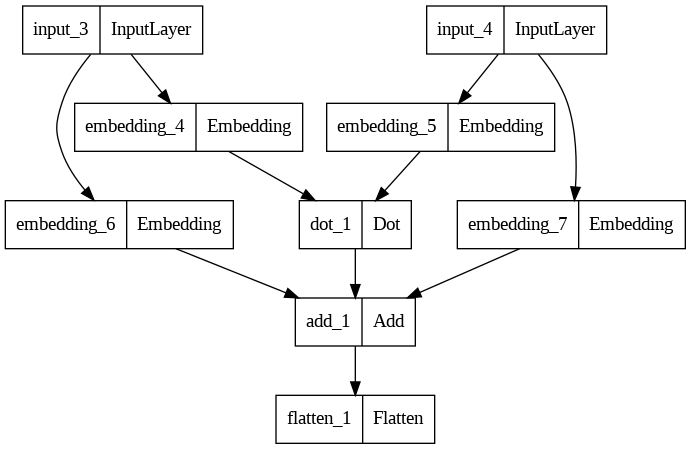

In [22]:
plot_model(model)

<br>

#### 모델 적합

In [26]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values],
  y=ratings_train.rating.values - mu, # 훈련 데이터의 출력을 지정. 출력은 예측값에서 전체 평균을 빼서 사용
  epochs=60,
  batch_size=256,
  validation_data=( # 테스트 데이터
    [ratings_test.user_id.values, ratings_test.movie_id.values],
    ratings_test.rating.values - mu
  ),
  verbose=False
)

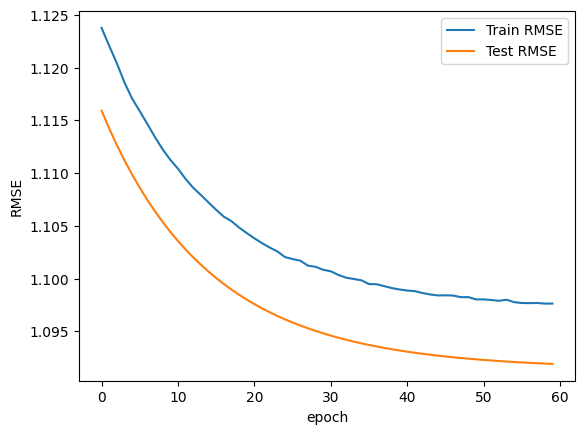

In [27]:
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<br>

#### 예측

In [28]:
user_ids = ratings_test.user_id.values[0:6]
movie_ids = ratings_test.movie_id.values[0:6]
predictions = model.predict([user_ids, movie_ids]) + mu

print("Actuals: \n", ratings_test[0:6])
print( )
print("Predictions: \n", predictions)

1/1 [==============================] - 0s 210ms/step
Actuals: 
        user_id  movie_id  rating
13028       10       435       5
77735      774       178       4
18849      360       269       4
99788      618       531       4
39112       43       781       3
37603      405       523       2

Predictions: 
 [[3.6135492]
 [3.4365764]
 [3.6005332]
 [3.5300062]
 [3.5405366]
 [3.1404352]]


- 테스트 데이터 전체에 대한 예측

In [29]:
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [30]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values

y_pred = model.predict([user_ids, movie_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

782/782 [==============================] - 1s 2ms/step


In [31]:
RMSE2(y_true, y_pred)

1.092670331610173

<br>

## 07.03. 딥러닝을 적용한 추천 시스템
- 딥러닝을 추천에 적용할 때,

  추천을 위한 입력으로 사용자와 아이템의 특성을 나타낼 수 있는 Embeding 데이터가 필요


- 사용자와 아이템을 Embedding해서 입력으로 넣으면, 사용자와 아이템 간의 특성을 학습하여 추천에 적용 가능

<img src='https://velog.velcdn.com/images/kimminyoung0/post/cfa7d81d-c51c-48b7-ae4f-838cd7df13d7/image.png'>

<br>

### 은닉층 추가
- MF를 구현한 신경망에는 은닉층이 없음

  하지만 대부분의 신경망 모형은 다수의 은닉층이 존재하여, 다양한 패턴을 학습할 수 있음

<img src='https://velog.velcdn.com/images%2Feclat12450%2Fpost%2F87794a55-7eed-4b90-a59a-8ad9288cff6d%2Fimage.png'>

- MF와 동일하게 사용자와 아이ㅏ템을 원-핫 인코딩으로 변환하고 (Input Layer)   이를 잠재요인 (Embedding Layer)로 연결

  $\rightarrow$ 사용자 잠재요인 (User Latent Vector)과 아이템 잠재요인 (Item Latent Vector)이 생성

  $\rightarrow$ **이 둘을 합쳐 신경망의 첫 번째 층 (Layer1)을 생성 (concatenate를 사용하여 앞뒤로 그대로 이어 붙임)**

  $\rightarrow$ 그 후 일반적인 딥러닝 모형과 같이 층을 쌓음

<br>

#### 모델 구축

In [35]:
from tensorflow.keras.layers import Dense, Concatenate, Activation

In [36]:
K = 200
mu = ratings_train.rating.mean()
M = ratings.user_id.max() + 1
N = ratings.movie_id.max() + 1

In [37]:
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

P_embedding = Flatten()(P_embedding)                                    # concatenate를 위하여 Flatten (K, )
Q_embedding = Flatten()(Q_embedding)                                    # concatenate를 위하여 Flatten (K, )
user_bias = Flatten()(user_bias)                                        # (1, )
item_bias = Flatten()(item_bias)                                        # (1, )
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])     # concatenate (2K + 2, )

R = Dense(2048)(R) # 노드가 2,048인 밀집층 추가
R = Activation('relu')(R) # 밀집층의 활성화 함수 : relu

R = Dense(256)(R) #  노드가 256인 밀집층 추가
R = Activation('linear')(R) # 밀집층의 활성화 함수 : linear

R = Dense(1)(R) # 출력층

<br>

#### 모델 컴파일

In [38]:
model = Model(inputs=[user, item], outputs=R)
model.compile(
  loss=RMSE,
  optimizer=SGD(), #optimizer=Adamax(),
  metrics=[RMSE]
)

- 2개의 입력층이 각각 Embedding Layer로 연결
- 사용자의 수가 944이기에 200개의 잠재요인에 연결되는 파라미터의 수는 총 188,800,
  
  아이템의 수가 1,683이므로 200개의 잠재요인에 연결되는 파라미터의 수는 총 336,600

- 사용자 Bias Layer은 944, 아이템 Bias Layer은 1,683개의 파라미터
- **4개의 Embedding Layer (User Embedding, Item Embedding, User Bias Embedding, Item Bias Embedding)는 하나의 층으로 concatenate**

  **concatenate된 층의 노드 수는 402개 노드 (사용자 Embedding 200개 + 아이템 Embedding 200개 + 사용자 Bias 1개 + 아이템 Bias 1개)**

  $\rightarrow$ **concatenate된 층은 다시 2,048, 256, 1개의 노드를 가진 밀집층으로 순서대로 연결**

In [39]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 1, 200)               188800    ['input_5[0][0]']             
                                                                                                  
 embedding_9 (Embedding)     (None, 1, 200)               336600    ['input_6[0][0]']             
                                                                                            

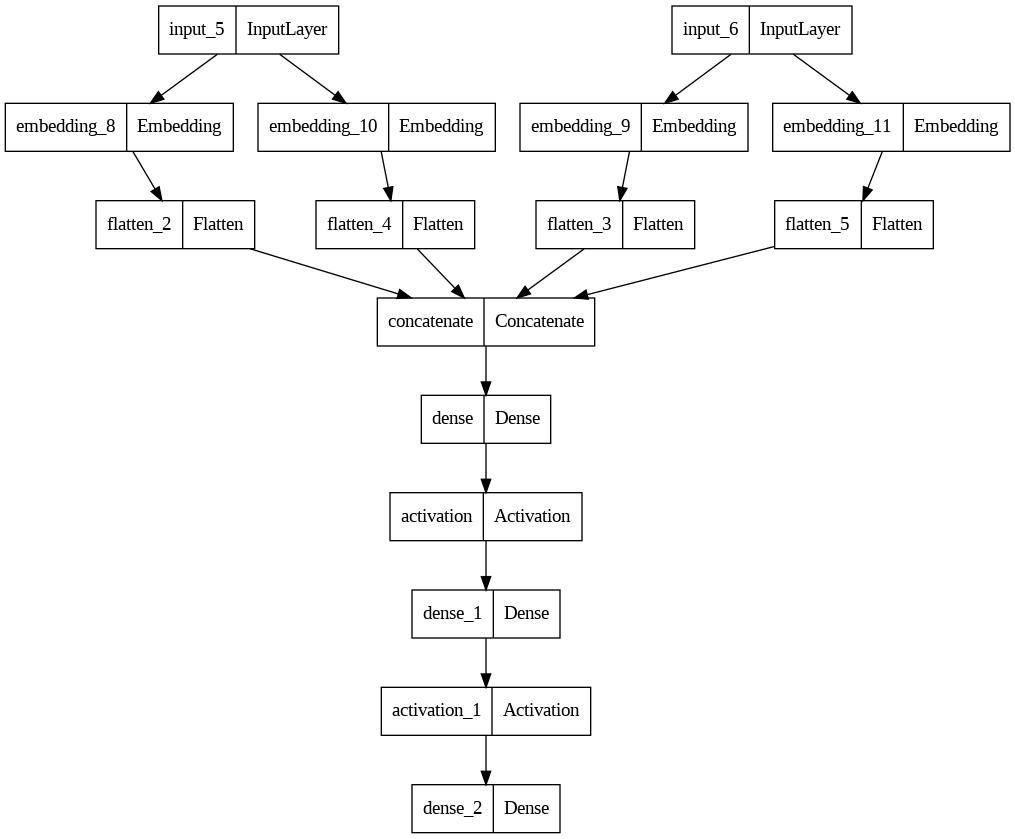

In [40]:
plot_model(model)

<br>

#### 모델 적합

In [41]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values],
  y=ratings_train.rating.values - mu,
  epochs=65,
  batch_size=512,
  validation_data=(
    [ratings_test.user_id.values, ratings_test.movie_id.values],
    ratings_test.rating.values - mu
  ),
  verbose=False
)

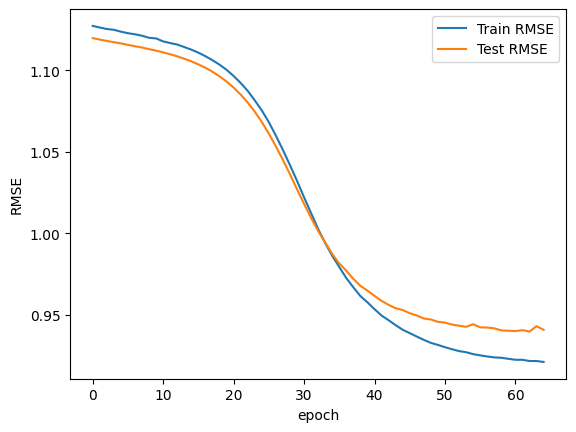

In [42]:
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<br>

#### 테스트 데이터에 대한 예측

- MF를 신경망으로 구현한 경우보다, 향상되었음을 확인
- **데이터가 binary 이거나, 숫자가 아닌 데이터인 경우, 혹은 데이터가 매우 희박한 경우에는 MF가 잘 작동하지 않기에 딥러닝을 사용**

In [43]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

782/782 [==============================] - 2s 2ms/step


In [44]:
RMSE2(y_true, y_pred)

0.9411554642089015

<br>

## 07.04. 딥러닝 모델에 변수 추가
- 딥러닝 신경망은 다양한 변수를 추가 가능

In [45]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [49]:
ratings.head()

,user_id,movie_id,rating
65513,843,142,2
26692,64,569,3
32200,311,621,4
21144,26,300,4
55648,721,680,3


<br>

#### `occupation` (직업) 변수 추가

In [46]:
TRAIN_SIZE = 0.75
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [47]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')
users = users[['user_id', 'occupation']]

In [48]:
users.head()

,user_id,occupation
0,1,technician
1,2,other
2,3,writer
3,4,technician
4,5,other


In [50]:
occupation = {}
def convert_occ(x):
    if x in occupation:
        return occupation[x]
    else:
        occupation[x] = len(occupation)
        return occupation[x]

users['occupation'] = users['occupation'].apply(convert_occ)

In [51]:
L = len(occupation)                                                             # occupation의 고유개수
train_occ = pd.merge(ratings_train, users, on='user_id')['occupation']          # 훈련/테스트 데이터의 사용자 열에 대한 occupation 매칭
test_occ = pd.merge(ratings_test, users, on='user_id')['occupation']

<br>

#### 모델 구축

In [52]:
K = 200
mu = ratings_train.rating.mean()
M = ratings.user_id.max() + 1
N = ratings.movie_id.max() + 1

In [53]:
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

occ = Input(shape=(1, ))                                                        # occupation에 대한 입력층
occ_embedding = Embedding(L, 3, embeddings_regularizer=l2())(occ)               # occupation을 3개의 잠재요인으로 Embedding
occ_layer = Flatten()(occ_embedding)
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias, occ_layer])  # P, Q, 사용자 Bias, 아이템 Bias 외에 occupation도 결합(concatenate)하여 하나의 층으로 연결

R = Dense(2048)(R)
R = Activation('relu')(R)
R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

<br>

#### 모델 컴파일

In [54]:
model = Model(inputs=[user, item, occ], outputs=R)

model.compile(
  loss=RMSE,
  optimizer=SGD(), #optimizer=Adamax(),
  metrics=[RMSE]
)

In [55]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_12 (Embedding)    (None, 1, 200)               188800    ['input_7[0][0]']             
                                                                                            

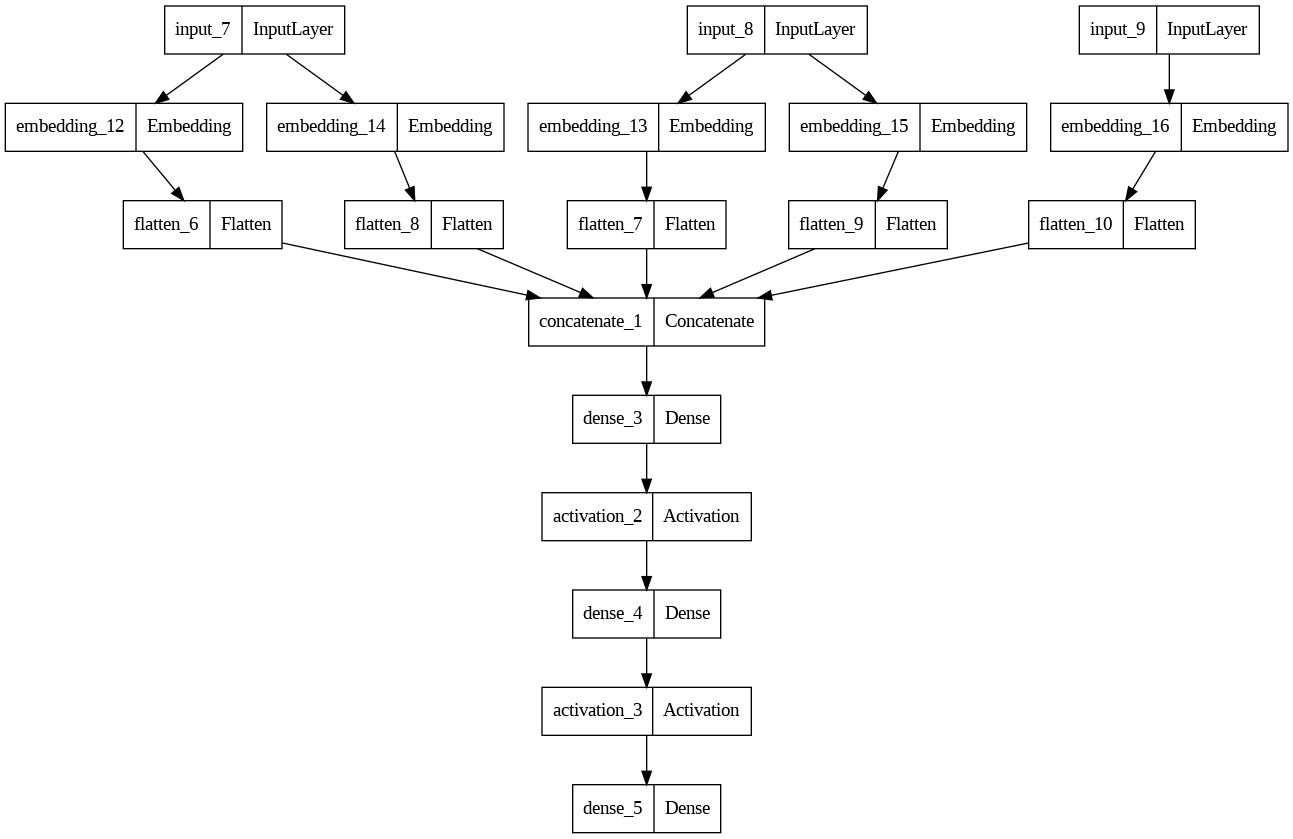

In [56]:
plot_model(model)

<br>

#### 모델 적합

In [57]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values, train_occ.values],
  y=ratings_train.rating.values - mu,
  epochs=65,
  batch_size=512,
  validation_data=(
    [ratings_test.user_id.values, ratings_test.movie_id.values, test_occ.values],
    ratings_test.rating.values - mu
  ),
  verbose=False
)

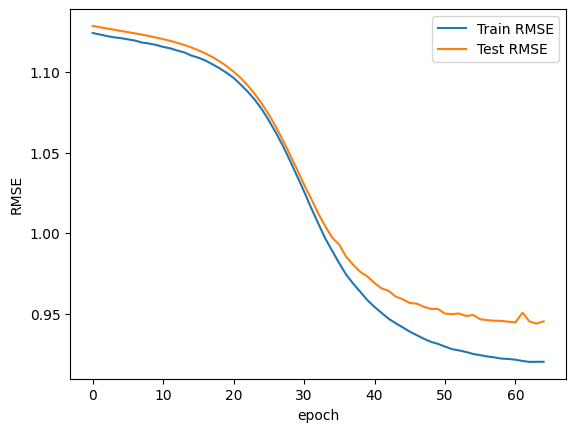

In [58]:
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<br>

#### 테스트 데이터에 대한 예측

In [59]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids, test_occ]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

782/782 [==============================] - 2s 3ms/step


In [60]:
RMSE2(y_true, y_pred)

0.9458573760631588